# Convert MATLAB file to CSV file example

To start with, it's important to verify the MATLAB version you're currently using. The [MathWorks website](https://www.mathworks.com/company/events/conferences/automotive-conference-michigan/2023.html) provides two options to access MATLAB:
1. MATLAB online version
2. Download MATLAB Software

This Jupyter notebook will guide you through the process of converting a MATLAB file (.mat) to a CSV file (.csv) using either of the methods mentioned above.

---

## 1) Download the "MATLAB transfer to CSV" function from github

You can find the four required function files for download in the directory "battery_degradation_prediction/src/battery_degradation_prediction/mat2csv/"

The required funtion files:
- datatime_plus_durations.m
- write_charging_data.m
- write_discharging_data.m
- mat2csv.m

---

## 2) Working with MATLAB with two different version

### 1. MATLAB online version

a) To begin, upload the four function files you obtained from GitHub and all your battery.mat files into MATLAB online version by right-click your mouse in current folder field and choose "upload Files". 
*Suggestion: create a folder to upload all of your files in it, it will be easier to organize*

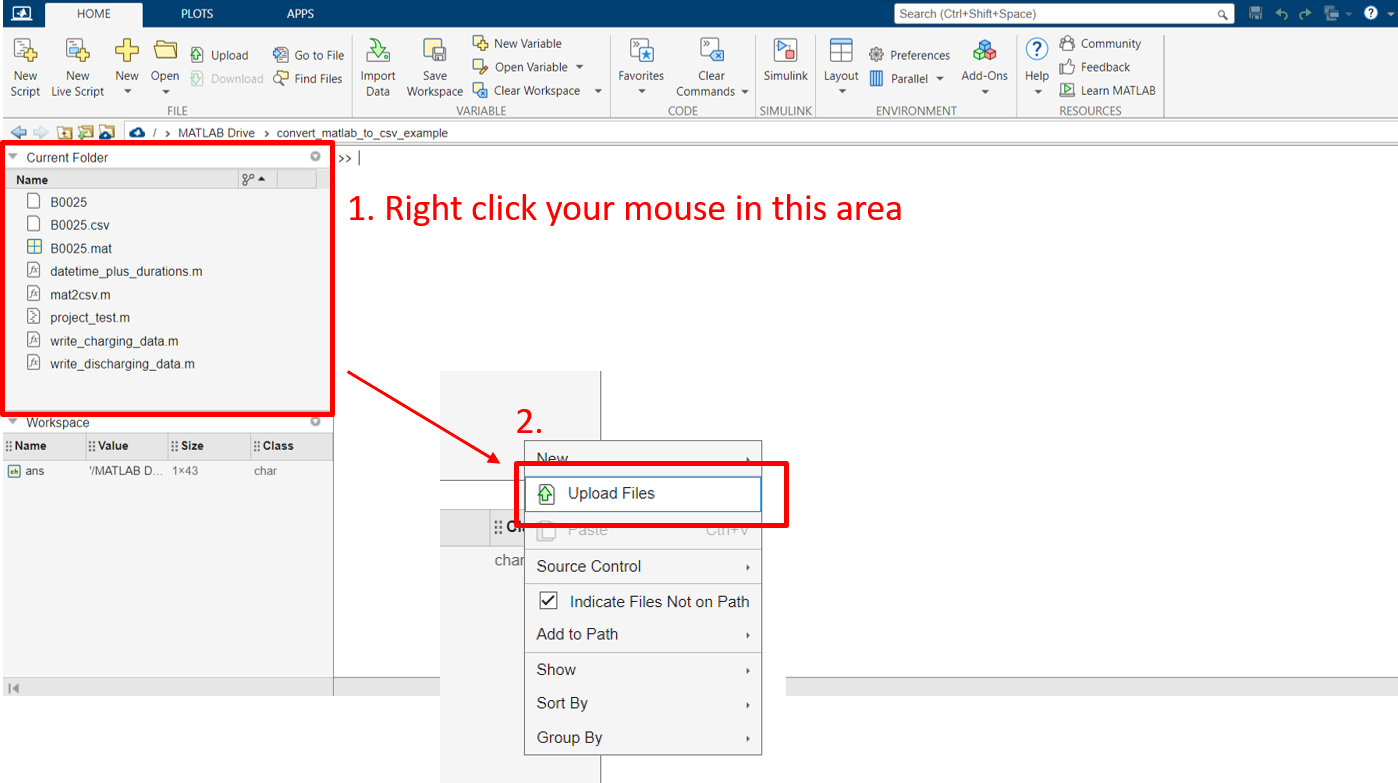

b) Next, create a new script by selecting "create new document" and then "script".

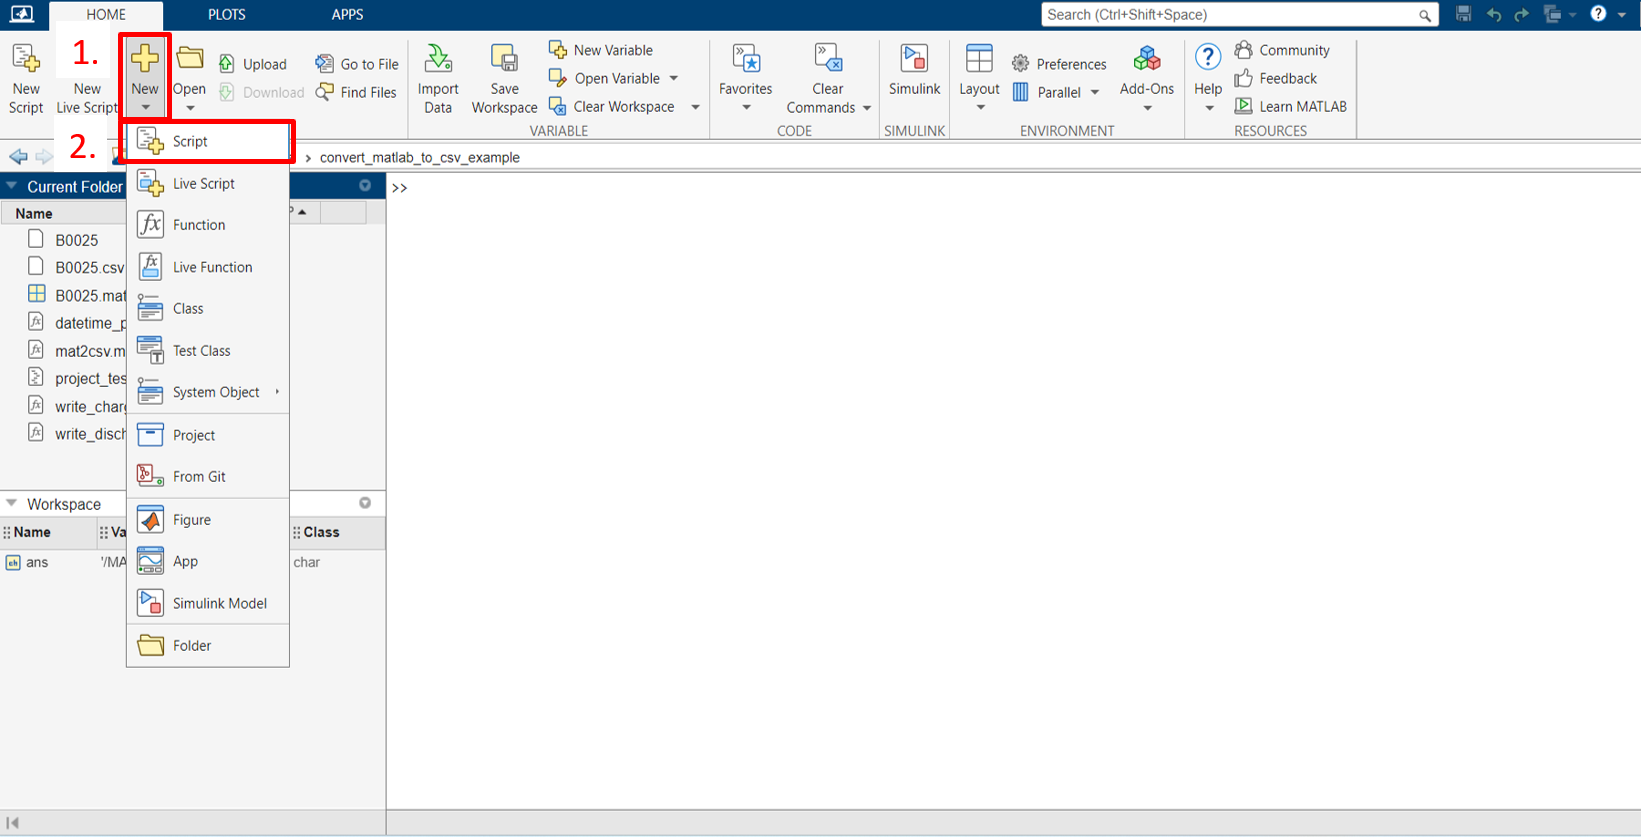

c) In the new script, type: 
```
mat2csv(filepath, output_name)
```
Then, run the script and MATLAB will generate the desired CSV file to the place you stored your function files. Remember to download it to your compurter before you use it.

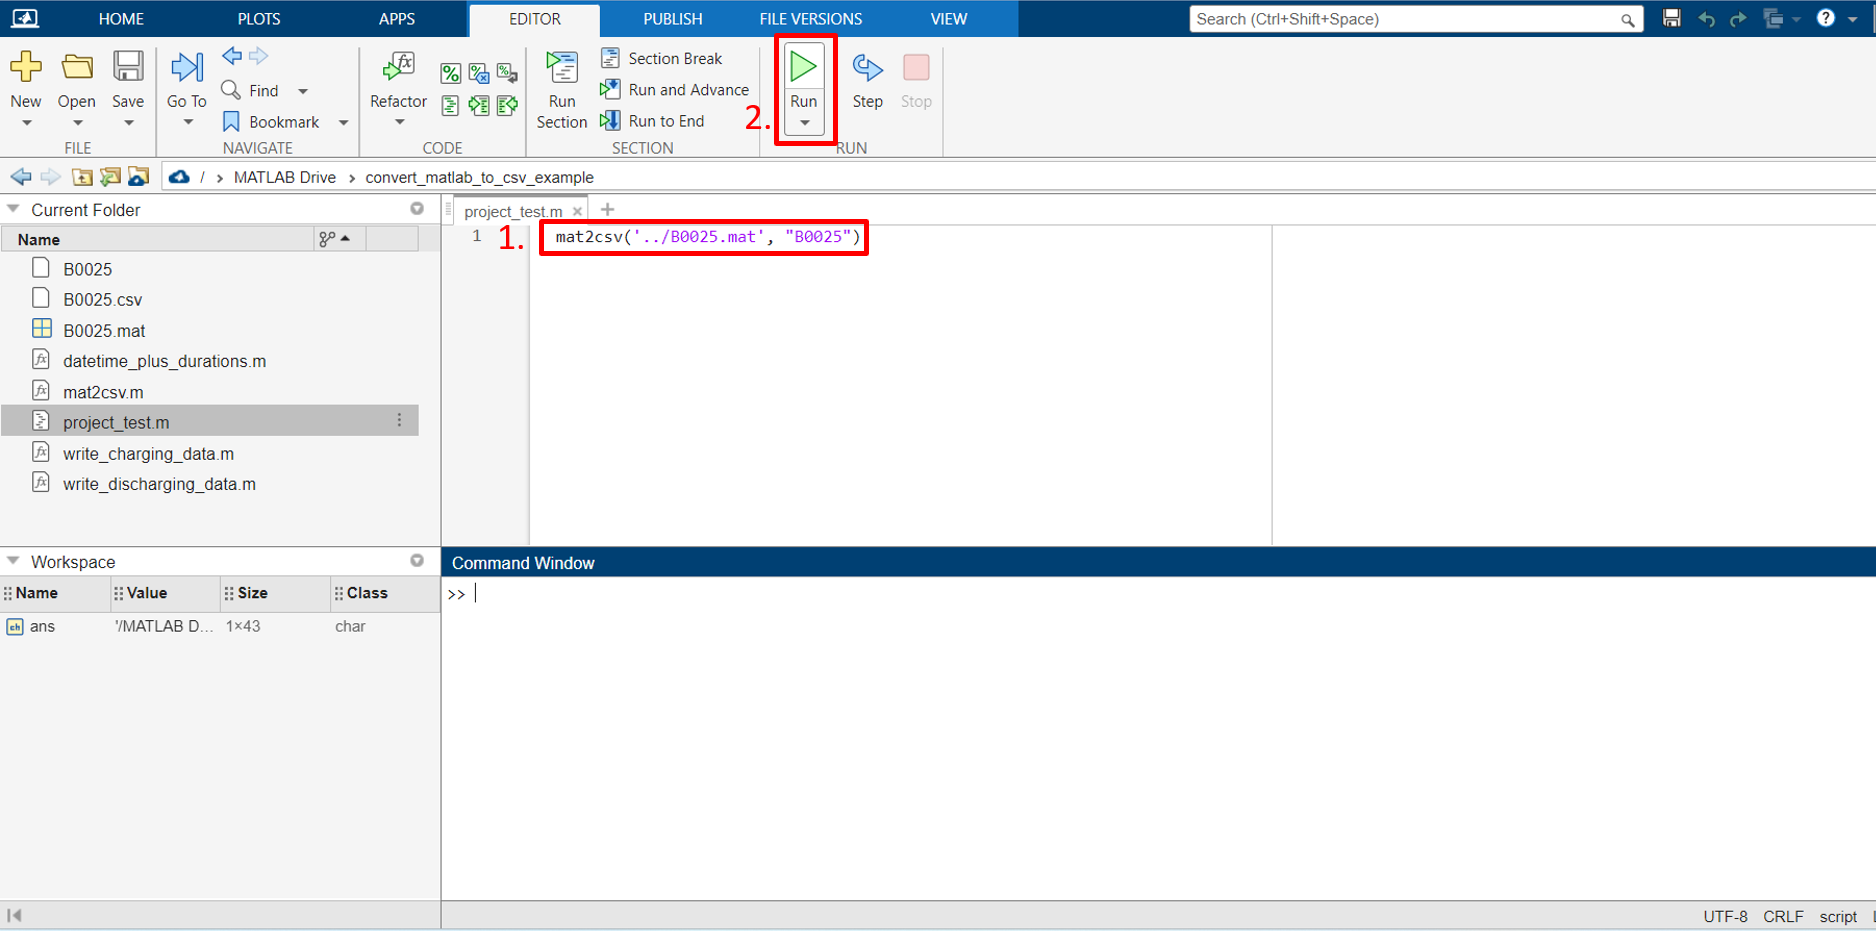

#### <center> Example of command

If you hava battery data file name as "B0025.mat" and want to output a csv file name "B0025.csv". 
    
You will type:
    
```
mat2csv("../B0025.mat","B0025.csv")
```
    
*If you have your own dataset, you will type:
```
mat2csv(/path/to/the/matlab_mat/filename, output_name.csv)
```
To get your `/path/to/the/matlab_mat` inform, in command window type:
```
pwd
``` 
And whatever the __ans =__ shows, copy and replace `/path/to/the/matlab_mat/` line.

### 2. Download MATLAB Software

a) To begin, ensure that the four function files you obtained from GitHub and all your battery.mat files are stored in the same folder.

b) Next, launch the MATLAB software and select "browse for folder" to choose the folder containing the functions and data.

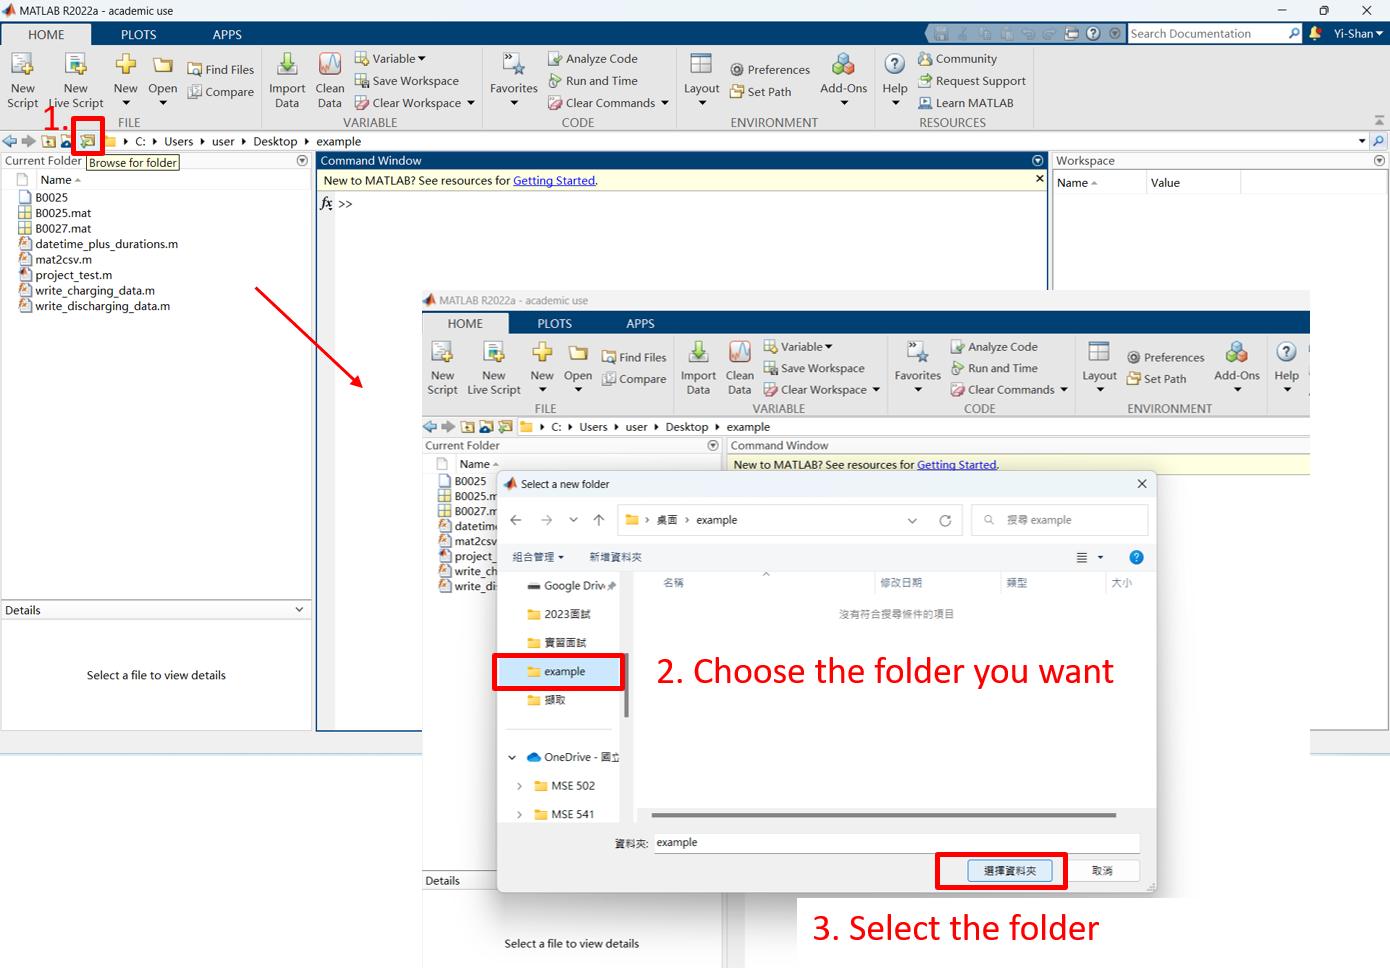

<div>
<img src="attachment:matab%20software%201-2.png" width="400"/>
</div>

c) Once the folder is selected, create a new script by selecting "create new document" and then "script". You can also press `ctrl+N` to create a new script easily.

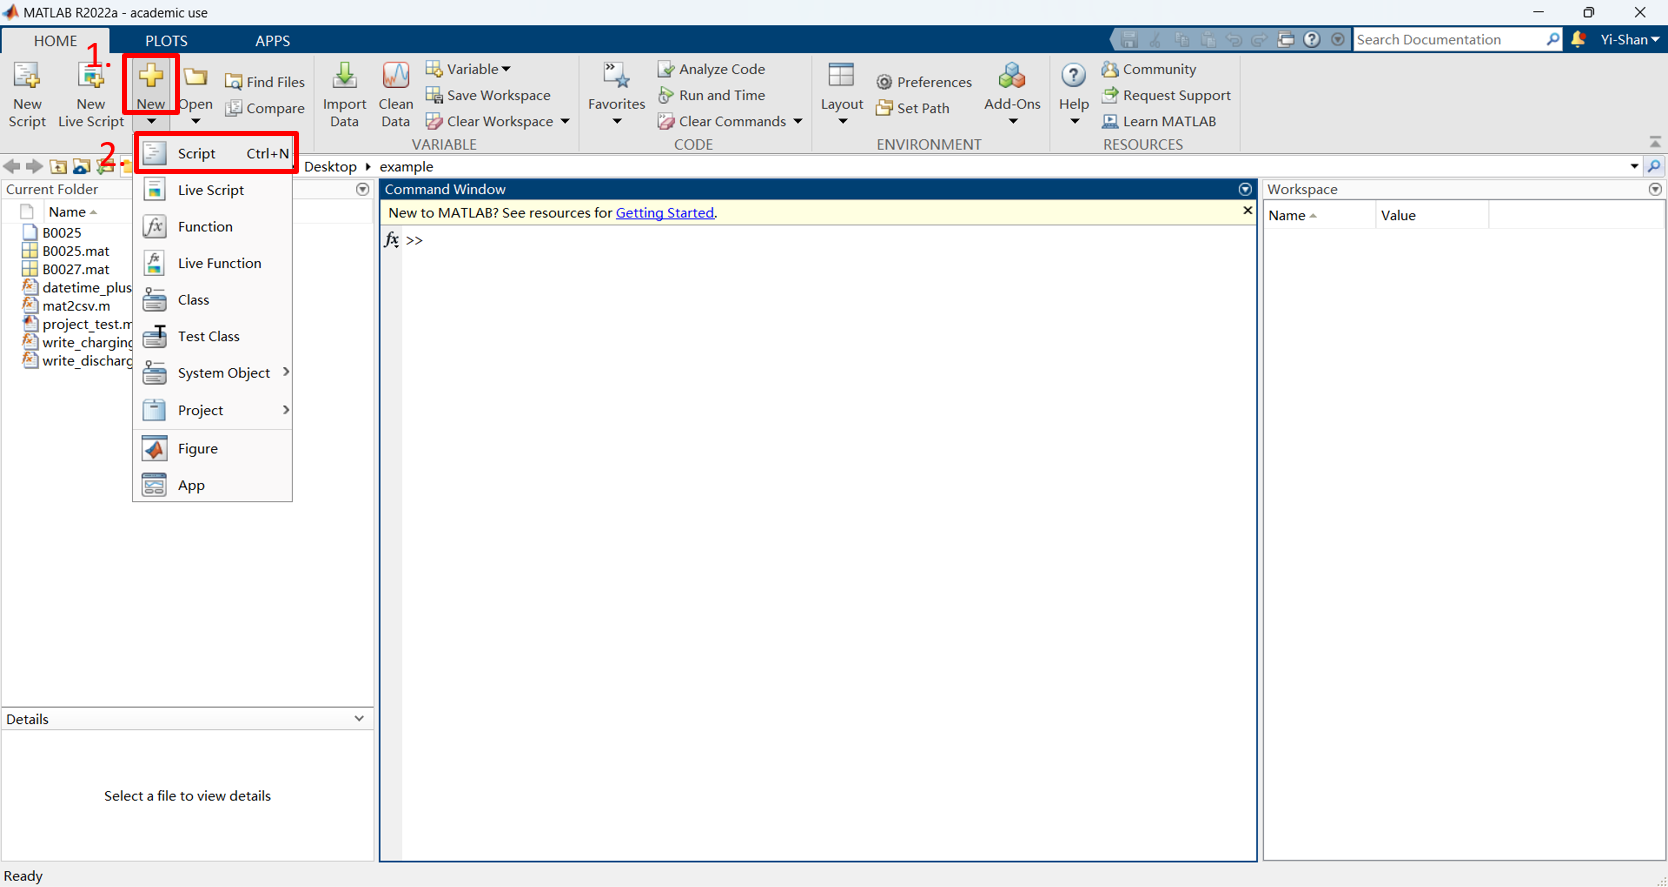

d) In the new script, type the command: 
```
mat2csv(filepath, output_name)
```
Then, run the script and MATLAB will generate the desired CSV file into the folder.

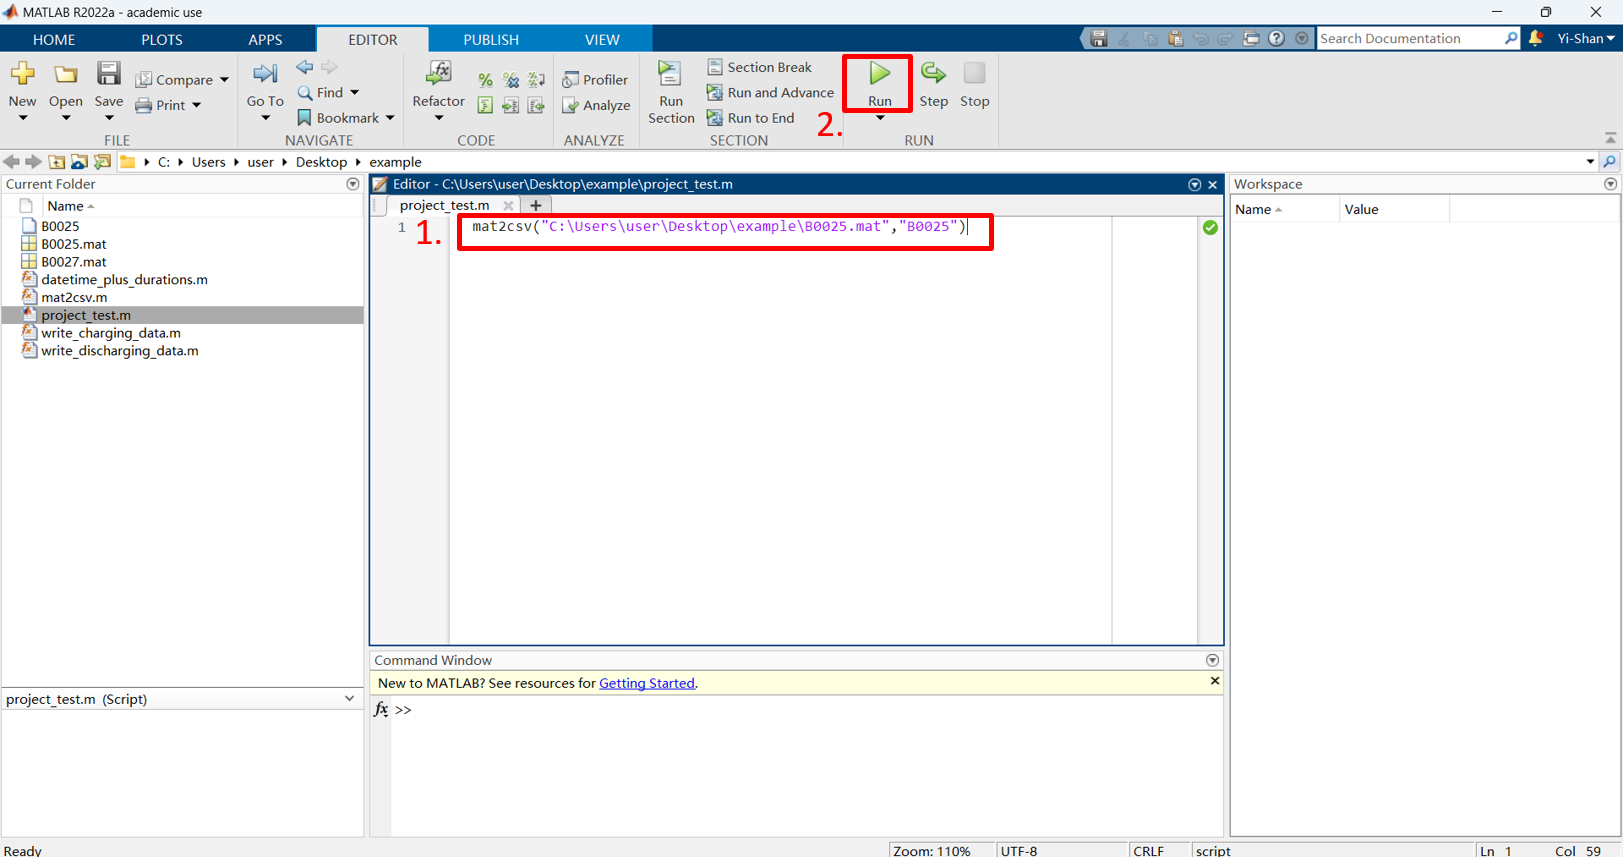

#### <center> Example of command

If you hava battery data file name as "B0025.mat" and want to output a csv file name "B0025.csv".
    
You will type: 
```
mat2csv("filepath","B0025.csv")
```
You can copy the filepath by right-checking wanted battery data file and copy the filepath.

---

## 3) How to know if you are doing the right step or not?

If the command window displays output similar to the following. __That's Great!!__

It indicates that MATLAB is currently functioning correctly. You just need to sit and wait for MATLAB running. Once the ">>" symbol appears again, it indicates that your MATLAB file has been transferred successfully. 

Now, you have your csv file in your folder.

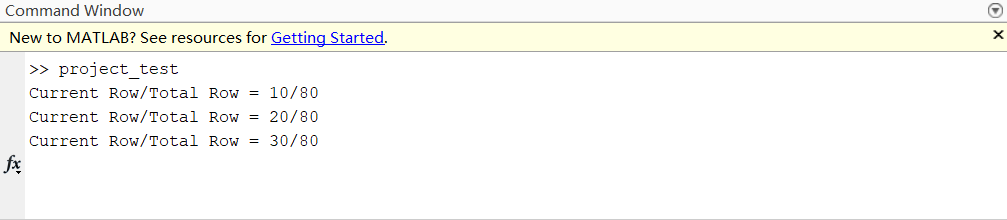

---

# Transfer function

In case you are unable to locate the transfer function on Github, you may simply copy and paste the following four functions into MATLAB. __Be sure to save each function as a separate file with the same name that we use.__

If you want to learn more about how to 

### datetime_plus_duratinon

```
function new_datetimes = datetime_plus_durations(current_datetime, durations)
    % Given a series of durations (unit in second), convert them to
    % date_time.
    %
    % Parameters
    % ----------
    % durations : matrix
    %     durations = [t0, t1, t2, ...] unit = [second]
    % current_datetime : datetime 
    %     DD-MM-YYYY HH:MM:SS
    %
    % Returns
    % -------
    % new_datetime : datetime
    %    current date time + duration, DD-MM-YYYY HH:MM:SS
    num_data = length(durations);
    num_char = length('yyyy-mm-dd-HH-MM-SS');
    new_datetimes = datestr(zeros(3,1), 'yyyy-mm-dd-HH-MM-SS');
    for i = 1:num_data
        new_datetimes(i, :) = datestr(current_datetime + seconds(durations(i)), 'yyyy-mm-dd-HH-MM-SS'); 
    end
end
```

### write_charging_data

```
function dummy = write_charging_data(csv_file, num_cycle, ambient_temp, row_information)
    time_cell = row_information(3);
    current_datetime = datetime(time_cell{1}(1:6));

    data_cell = row_information(4);
    data_struct = data_cell{1};
    Time = data_struct.Time;
    new_datetimes = datetime_plus_durations(current_datetime, Time);

    Voltage_measured = data_struct.Voltage_measured;
    Current_measured = data_struct.Current_measured;
    Temperature_measured = data_struct.Temperature_measured;
    Current_charge = data_struct.Current_charge;
    Voltage_charge = data_struct.Voltage_charge;
    
    for line = 1:size(new_datetimes, 1)
       fprintf(csv_file, '%d,%s,%d,%f,%f,%f,%f,%f,%s,%f\n', ...
               num_cycle, ...
               "charging", ...
               ambient_temp, ...
               Voltage_measured(1,line), ...
               Current_measured(1,line), ...
               Temperature_measured(1,line), ...
               Current_charge(1,line), ...
               Voltage_charge(1,line), ...
               new_datetimes(line, :), ...
               NaN);
    end
end
```

### write_discharging_data

```
function dummy = write_discharging_data(csv_file, num_cycle, ambient_temp, row_information)
    time_cell = row_information(3);
    current_datetime = datetime(time_cell{1}(1:6));

    data_cell = row_information(4);
    data_struct = data_cell{1};
    Time = data_struct.Time;
    new_datetimes = datetime_plus_durations(current_datetime, Time);

    Voltage_measured = data_struct.Voltage_measured;
    Current_measured = data_struct.Current_measured;
    Temperature_measured = data_struct.Temperature_measured;
    Current_load = data_struct.Current_load;
    Voltage_load = data_struct.Voltage_load;
    Capacity = data_struct.Capacity;
    for line = 1:size(new_datetimes, 1)
       fprintf(csv_file, '%d,%s,%d,%f,%f,%f,%f,%f,%s,%f\n', ...
               num_cycle, ...
               "discharging", ...
               ambient_temp, ...
               Voltage_measured(1,line), ...
               Current_measured(1,line), ...
               Temperature_measured(1,line), ...
               Current_load(1,line), ...
               Voltage_load(1,line), ...
               new_datetimes(line, :), ...
               Capacity);
    end
end
```

### mat2csv

```
function dummy = mat2csv(filepath, output_name)
    S=load(filepath);
    csv_file = fopen(output_name, 'wt');
    cHeader = {'cycle' 'type' 'ambient_temp' 'voltage_measured' 'current_measured' 'temperature_measured' 'current_charge' 'voltage_charge' 'datetime' 'capacity'};
    commaHeader = [cHeader;repmat({','},1,numel(cHeader))]; %insert commaas
    commaHeader = commaHeader(:)';
    textHeader = cell2mat(commaHeader); %cHeader in text with commas
    %write header to file
    fprintf(csv_file,'%s\n',textHeader);
    
    cell_list = struct2cell(S);
    cycle_struct = cell_list{1}.cycle;
    cycle_cell = struct2cell(cycle_struct);
    num_row = size(cycle_cell, 3);
    num_cycle_charge = 0;
    num_cycle_discharge = 0;
    %num_row = 150; % This variable determines how many rows are converted
                    % into the csv file.

    for row = 1:num_row
        if mod(row, 10) == 0
            disp("Current Row/Total Row = " + string(row)+"/"+string(num_row))
        end
        row_information = cycle_cell(:,:,row);  % The first element refers to columns, the second one doesn't have any meaning, and the third one refers to row
        ambient_temp = row_information{2};
        if strcmp(row_information{1}, "charge")
            num_cycle_charge = num_cycle_charge + 1;
            write_charging_data(csv_file, num_cycle_charge, ambient_temp, row_information);
        elseif strcmp(row_information{1}, "discharge")
            num_cycle_discharge = num_cycle_discharge + 1;
            write_discharging_data(csv_file, num_cycle_discharge, ambient_temp, row_information);
        end
    end
    fclose(csv_file);
end
```